# Actividad: Nivel de ajuste de un modelo y validación cruzada

**Parte 1:**
- Explicaciones sobre sobreajuste, subajuste, sesgo, varianza y validación cruzada.

## Niveles de ajuste de un modelo
- **Sobreajuste:** El modelo aprende demasiado los datos de entrenamiento, incluyendo el ruido. Ejemplo: Un árbol de decisión muy profundo que memoriza cada punto.
- **Subajuste:** El modelo es demasiado simple y no captura la relación real. Ejemplo: Una regresión lineal para datos claramente no lineales.
- **Ajuste apropiado:** El modelo generaliza bien, aprende patrones reales y predice correctamente en nuevos datos. Ejemplo: Un árbol de decisión con profundidad óptima que predice bien en entrenamiento y prueba.

## Trade-off entre sesgo y varianza
- **Sesgo:** Error por suposiciones demasiado simples.
- **Varianza:** Error por sensibilidad excesiva a los datos de entrenamiento.
- **Sobreajuste:** baja sesgo, alta varianza. **Subajuste:** alta sesgo, baja varianza.
- **Ejemplo de equilibrio:** Usar regularización (como Ridge o Lasso) para evitar que el modelo se ajuste demasiado a los datos.

## Validación cruzada
- Técnica para evaluar el rendimiento de un modelo dividiendo los datos en varios subconjuntos.
- **Hold-Out:** Separa los datos en entrenamiento y prueba una sola vez.
- **k-Fold:** Divide los datos en k partes, entrena y prueba k veces.
- **Random Subsampling:** Selecciona aleatoriamente subconjuntos varias veces.
- **Leave-One-Out:** Cada muestra es usada una vez como prueba, el resto como entrenamiento.

## Implementación con Scikit-Learn
- Se implementa usando funciones como cross_val_score y GridSearchCV.
- Ejemplo:
```python
from sklearn.model_selection import cross_val_score, GridSearchCV
cross_val_score(modelo, X, y, cv=5)
GridSearchCV(modelo, param_grid, cv=5)
```

**Parte 2:** Ejemplo práctico con datos reales
Vamos a usar el dataset de Boston Housing (o similar) para ilustrar el ajuste de modelos y la validación cruzada.

In [28]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
# Cargar datos reales
data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


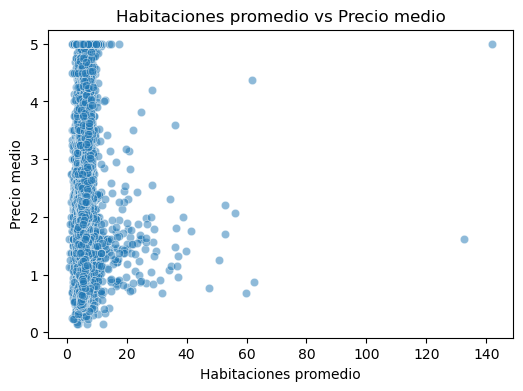

In [30]:
# Visualización: Relación entre superficie y precio
plt.figure(figsize=(6,4))
sns.scatterplot(x='AveRooms', y='MedHouseVal', data=df, alpha=0.5)
plt.title('Habitaciones promedio vs Precio medio')
plt.xlabel('Habitaciones promedio')
plt.ylabel('Precio medio')
plt.show()

In [31]:
# División en entrenamiento y prueba
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Entrenamiento y evaluación de modelos
modelos = {
    'Regresión Lineal': LinearRegression(),
    'Árbol de Decisión': DecisionTreeRegressor(max_depth=5)
}
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{nombre} - MSE: {mse:.2f}, R²: {r2:.2f}')

Regresión Lineal - MSE: 0.56, R²: 0.58
Árbol de Decisión - MSE: 0.52, R²: 0.60


In [33]:
# Validación cruzada k-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
modelo = LinearRegression()
scores = cross_val_score(modelo, X, y, cv=kf, scoring='r2')
print(f'Validación cruzada (R²) - Regresión Lineal: {scores}')
print(f'Promedio R²: {scores.mean():.2f}')

Validación cruzada (R²) - Regresión Lineal: [0.57578771 0.61374822 0.60856043 0.62126494 0.5875292 ]
Promedio R²: 0.60


In [34]:
# Ajuste de hiperparámetros con GridSearchCV para Árbol de Decisión
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='r2')
grid.fit(X, y)

print(f"Mejores hiperparámetros: {grid.best_params_}")
print(f"Mejor R² promedio (validación cruzada): {grid.best_score_:.2f}")

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
Mejor R² promedio (validación cruzada): 0.53


In [37]:
# Ajuste de hiperparámetros con GridSearchCV para Regresión Lineal
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

# Usamos Ridge y Lasso porque LinearRegression no tiene hiperparámetros relevantes para ajustar
param_grid_ridge = {
    'alpha': [0.05, 0.01, 0.1, 1, 10, 100]
}
grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='r2')
grid_ridge.fit(X, y)
print(f"Mejor alpha (Ridge): {grid_ridge.best_params_['alpha']}")
print(f"Mejor R² promedio (Ridge): {grid_ridge.best_score_:.2f}")

param_grid_lasso = {
    'alpha': [0.05, 0.01, 0.1, 1, 10, 100]
}
grid_lasso = GridSearchCV(Lasso(max_iter=10000), param_grid_lasso, cv=5, scoring='r2')
grid_lasso.fit(X, y)
print(f"Mejor alpha (Lasso): {grid_lasso.best_params_['alpha']}")
print(f"Mejor R² promedio (Lasso): {grid_lasso.best_score_:.2f}")

Mejor alpha (Ridge): 100
Mejor R² promedio (Ridge): 0.55
Mejor alpha (Lasso): 0.01
Mejor R² promedio (Lasso): 0.55
Mejor alpha (Lasso): 0.01
Mejor R² promedio (Lasso): 0.55


## Reflexión final
La validación cruzada permite estimar el rendimiento real del modelo y ajustar hiperparámetros para evitar sobreajuste o subajuste.
Modelos más complejos pueden tener mayor varianza, mientras que modelos simples pueden tener mayor sesgo.
El equilibrio se logra probando diferentes algoritmos y usando validación cruzada para seleccionar el mejor.